### EDA AND FEATURE ENGINEERING 

### PROBLEM STATEMENT


 ##### Develop a robust predictive model to forecast superstore sales with precision. This will support strategic decision-making and enhance overall business performance.



  


In [137]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
df = pd.read_csv("superstore.csv" , encoding="latin-1")

In [139]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433.0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium
1,22253.0,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium
2,48883.0,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.640,8.17,High
3,11731.0,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High
4,22255.0,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium


##### FINDING NULL VALUES AND HANDLING THEM

In [140]:
df.shape

(51290, 24)

In [141]:
df.isnull().sum()

row_id               63
order_id             63
order_date           63
ship_date            63
ship_mode            63
customer_id          63
customer_name        63
segment              63
city                 63
state                63
country              63
postal_code       41303
market               63
region               63
product_id           63
category             63
sub_category         63
product_name         63
sales                63
quantity             63
discount             63
profit               63
shipping_cost        63
order_priority       63
dtype: int64

In [142]:
df=df.drop(['postal_code'],axis=1)

In [143]:
df=df.dropna()


##### With 51227 rows and only 63 missing values per column (~0.12%), dropna was chosen to ensure data integrity without introducing bias.
#####  Imputation, requiring assumptions, was avoided as the missing data was negligible.
    Imputation Methods:
        Mean/Median: For numerical data with minimal variation, (Median for outliers).
        Mode: For categorical or discrete data.
        KNN/Regression: For larger missing proportions or when patterns exist in the data.

##### HANDLING DATATYPES

In [144]:
df.dtypes

row_id            float64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
customer_name      object
segment            object
city               object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity          float64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
dtype: object

In [145]:
df['order_date'] = df['order_date'].astype(str).str.strip()

df['order_date'] = pd.to_datetime(
    df['order_date'].apply(lambda x: x.replace('-', '/') if '-' in x else x), 
    errors='coerce', 
    dayfirst=True 
)

In [146]:
df['ship_date'] = df['ship_date'].astype(str).str.strip()


df['ship_date'] = pd.to_datetime(
    df['ship_date'].apply(lambda x: x.replace('-', '/') if '-' in x else x), 
    errors='coerce', 
    dayfirst=True  
)


In [147]:
categorical_columns = [
    'ship_mode', 'customer_name', 'segment',
    'city', 'state', 'country', 'market', 'region',
    'category', 'sub_category', 'product_name', 'order_priority'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

float_columns = ['row_id', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost']
df[float_columns] = df[float_columns].astype(float)

print(df.dtypes)


row_id                   float64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
customer_id               object
customer_name           category
segment                 category
city                    category
state                   category
country                 category
market                  category
region                  category
product_id                object
category                category
sub_category            category
product_name            category
sales                    float64
quantity                 float64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority          category
dtype: object


##### HANDLING OUTLIERS 

<Axes: >

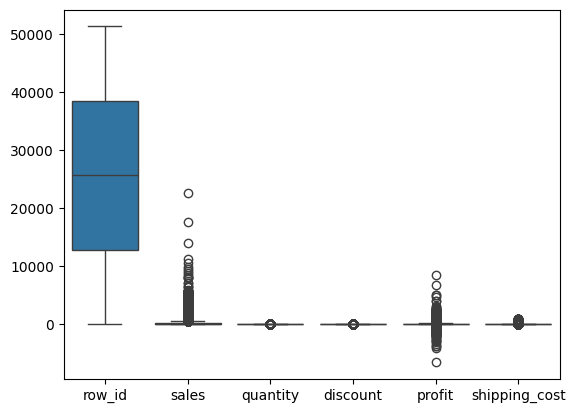

In [148]:
sns.boxplot(df)

In [149]:
df.shape

(51227, 23)

##### CHECKING DUPLICATES

In [150]:
duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


##### Analyzing insights through data visualizations

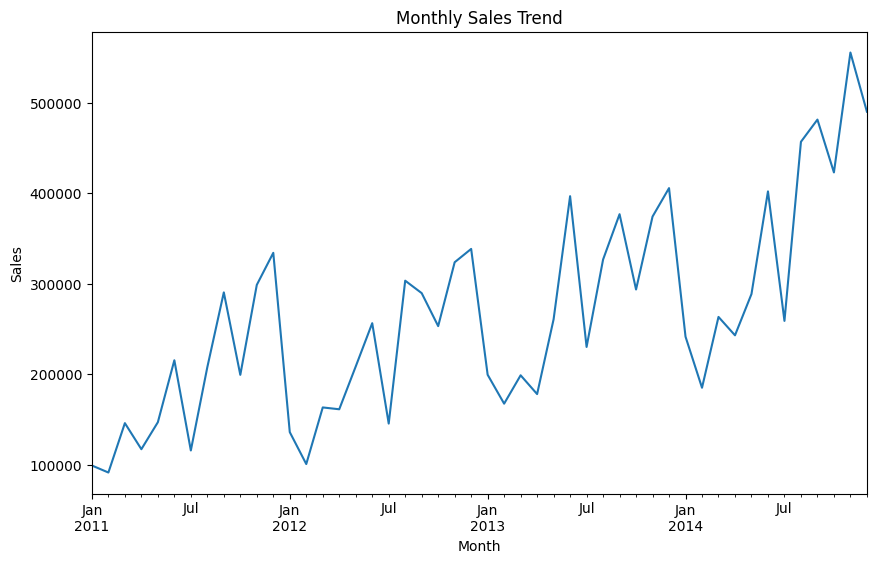

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\1350461374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales_profit = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)


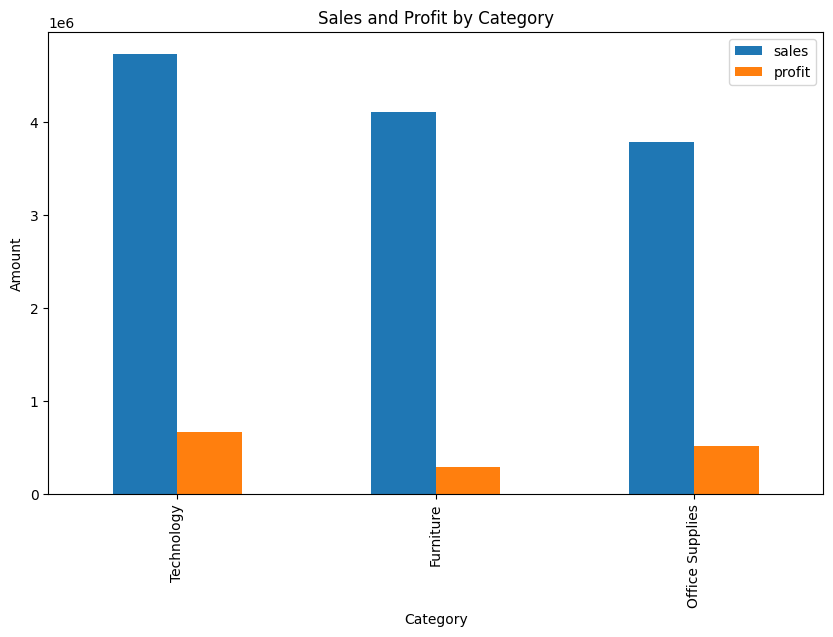

In [152]:
category_sales_profit = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

category_sales_profit.plot(kind='bar', figsize=(10, 6), title='Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()


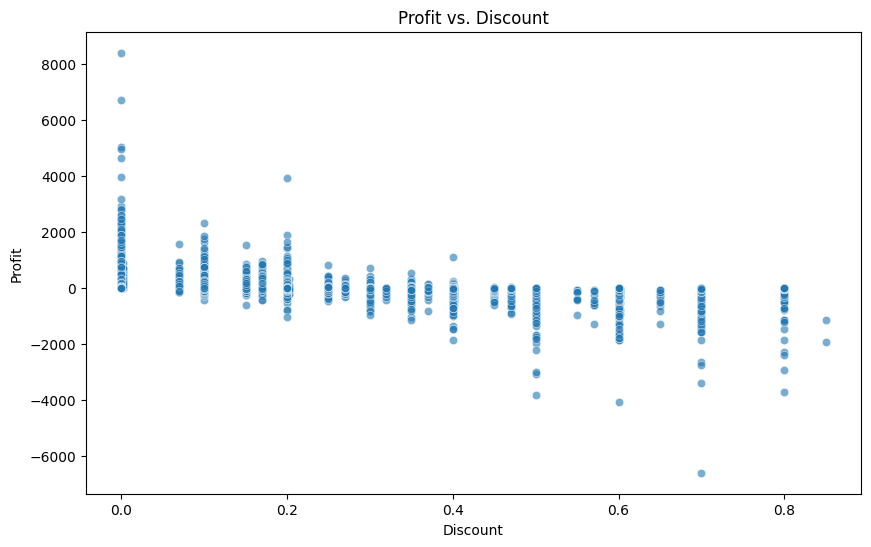

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.6)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\2852607893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_sales_profit = df.groupby('segment')[['sales', 'profit']].sum()


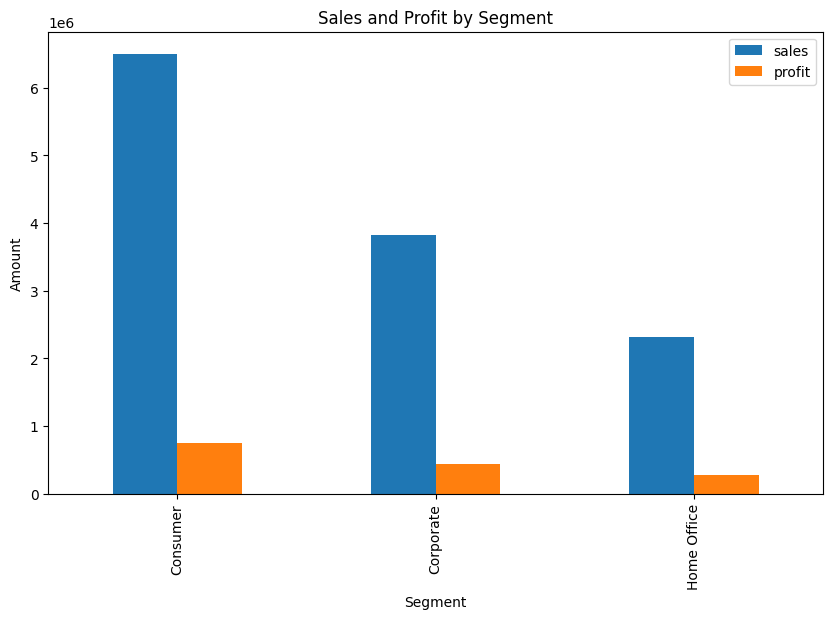

In [154]:
segment_sales_profit = df.groupby('segment')[['sales', 'profit']].sum()

segment_sales_profit.plot(kind='bar', figsize=(10, 6), title='Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.show()


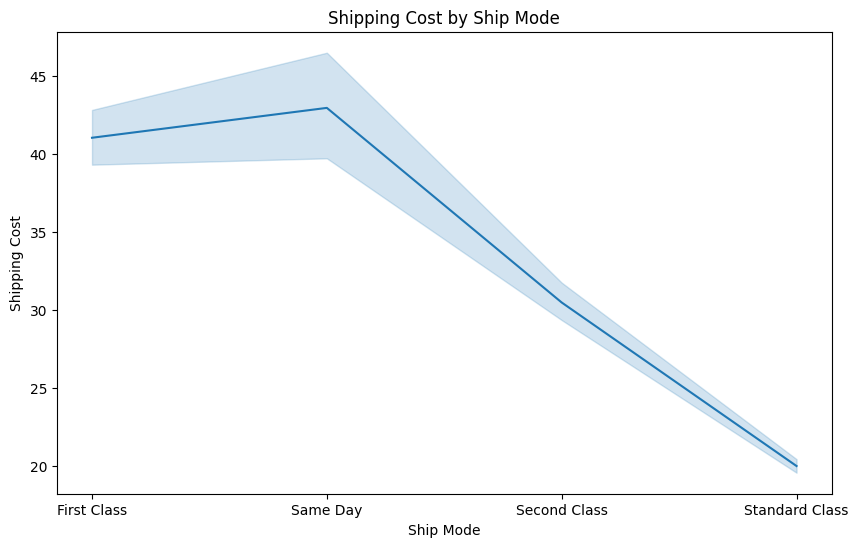

In [155]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ship_mode', y='shipping_cost')
plt.title('Shipping Cost by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Cost')
plt.show()


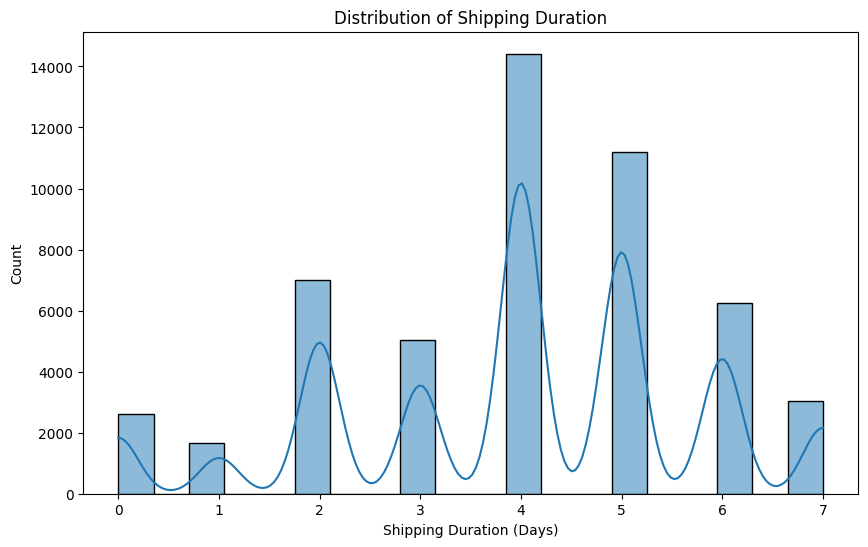

In [156]:
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['shipping_duration'], bins=20, kde=True)
plt.title('Distribution of Shipping Duration')
plt.xlabel('Shipping Duration (Days)')
plt.show()

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\943370117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cities = df.groupby('city')['sales'].sum().nlargest(10)


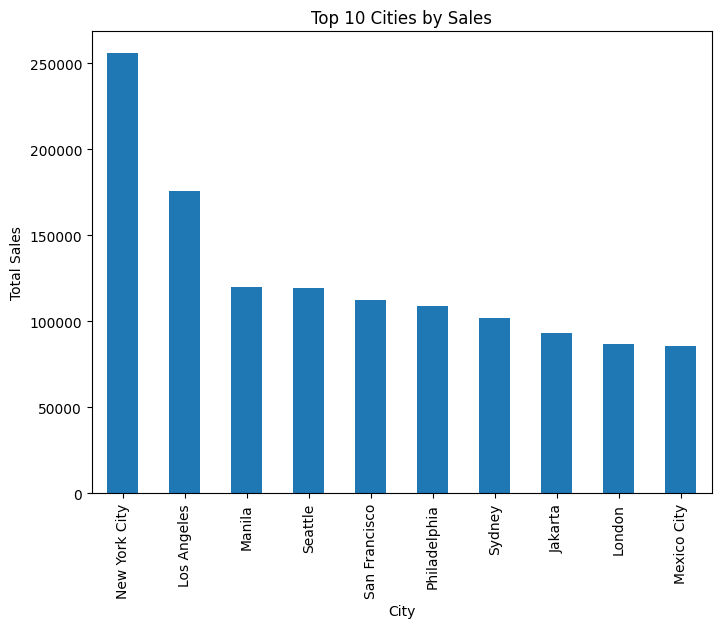

In [157]:
top_cities = df.groupby('city')['sales'].sum().nlargest(10)

top_cities.plot(kind='bar', figsize=(8, 6), title='Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\3210652636.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)


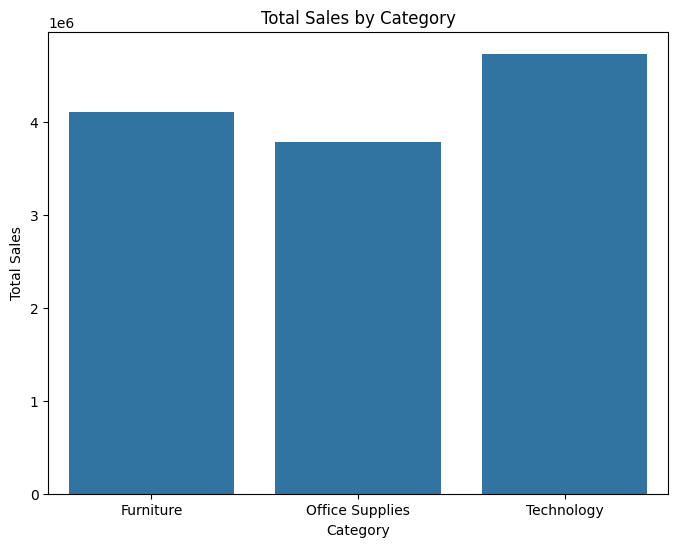

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\3210652636.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sub_category', y='sales', estimator=sum, ci=None)


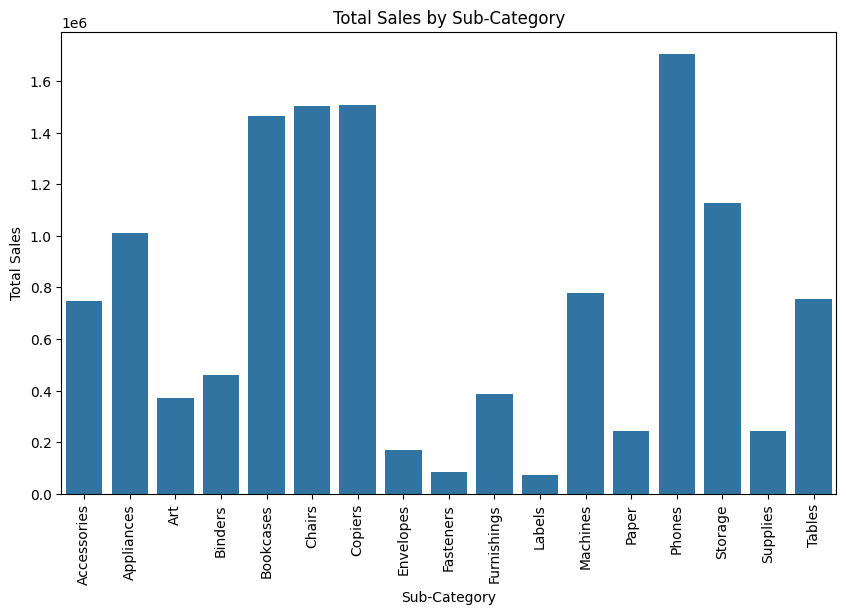

In [158]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sub_category', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


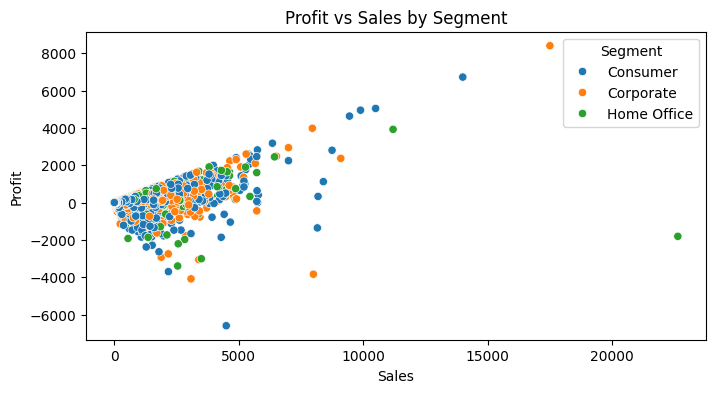

In [159]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='sales', y='profit', hue='segment')
plt.title('Profit vs Sales by Segment')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Segment')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\1514039159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby('region')['sales'].sum().sort_values()


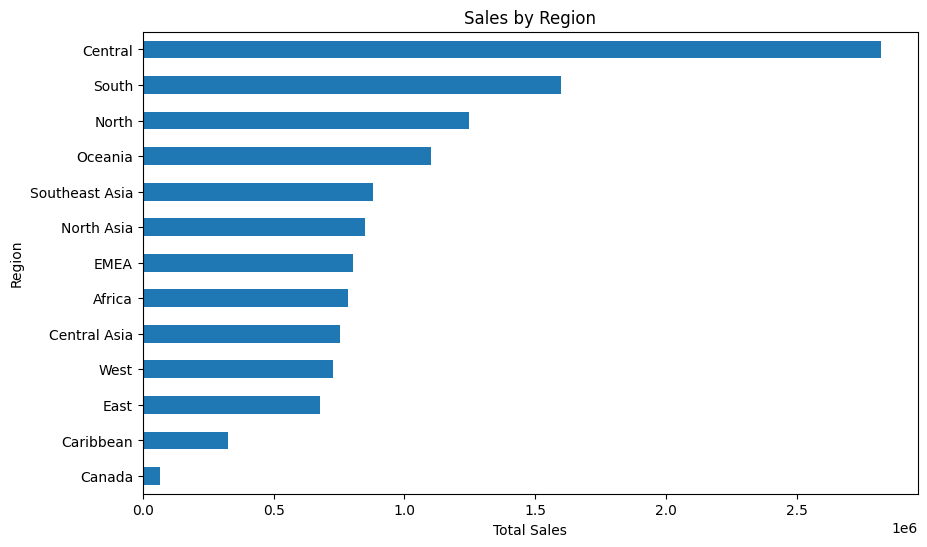

In [160]:
region_sales = df.groupby('region')['sales'].sum().sort_values()
region_sales.plot(kind='barh', figsize=(10, 6), title='Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


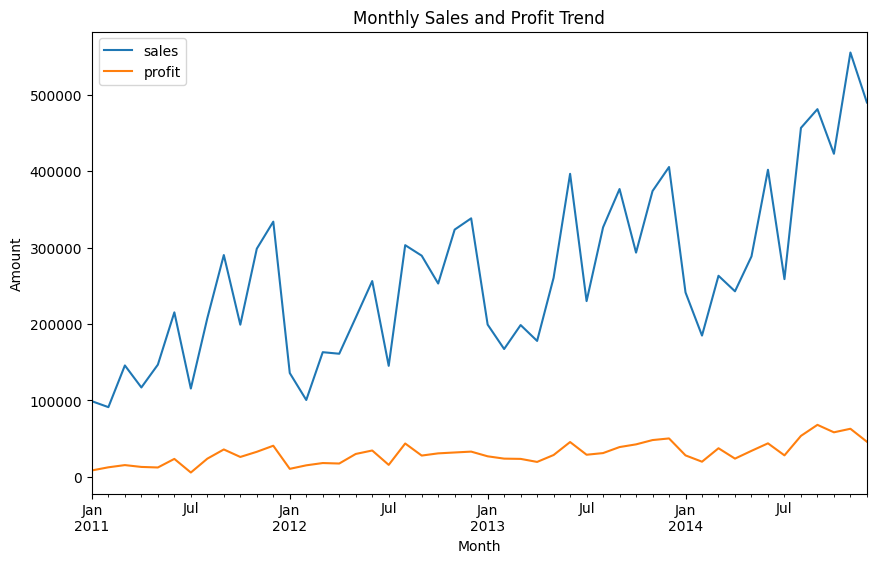

In [161]:
monthly_data = df.set_index('order_date').resample('M')[['sales', 'profit']].sum()

monthly_data.plot(kind='line', figsize=(10, 6), title='Monthly Sales and Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\3871100860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_sales = df.groupby('segment')['sales'].sum()
C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\3871100860.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_profit = df.groupby('segment')['profit'].sum()


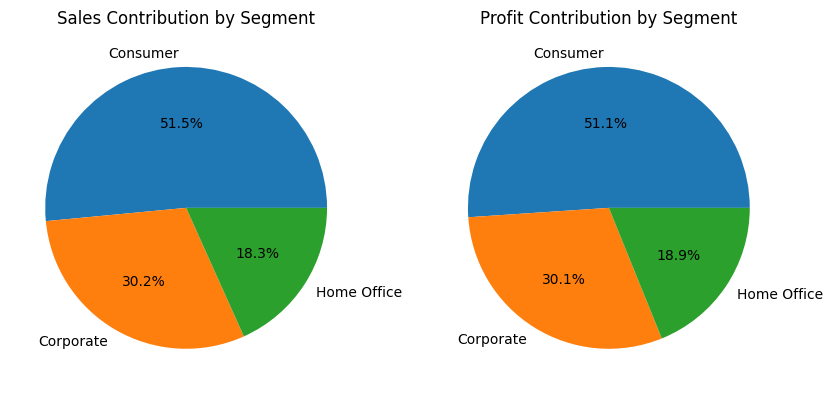

In [162]:
segment_sales = df.groupby('segment')['sales'].sum()
segment_profit = df.groupby('segment')['profit'].sum()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
segment_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Contribution by Segment')
plt.ylabel('')

plt.subplot(1, 2, 2)
segment_profit.plot(kind='pie', autopct='%1.1f%%', title='Profit Contribution by Segment')
plt.ylabel('')

plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\607062309.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby('category')['sales'].sum()


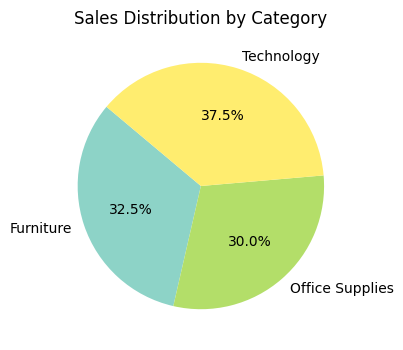

In [163]:
plt.figure(figsize=(4, 4))
category_sales = df.groupby('category')['sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\2372122311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ship_mode_sales = df.groupby('ship_mode')['sales'].sum().sort_values()


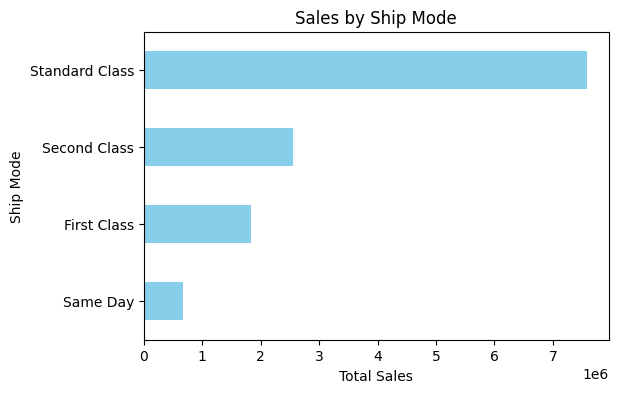

In [164]:
plt.figure(figsize=(6, 4))
ship_mode_sales = df.groupby('ship_mode')['sales'].sum().sort_values()
ship_mode_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Ship Mode')
plt.xlabel('Total Sales')
plt.ylabel('Ship Mode')
plt.show()


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\3414077842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_category_profit = df.groupby('sub_category')['profit'].sum().sort_values()


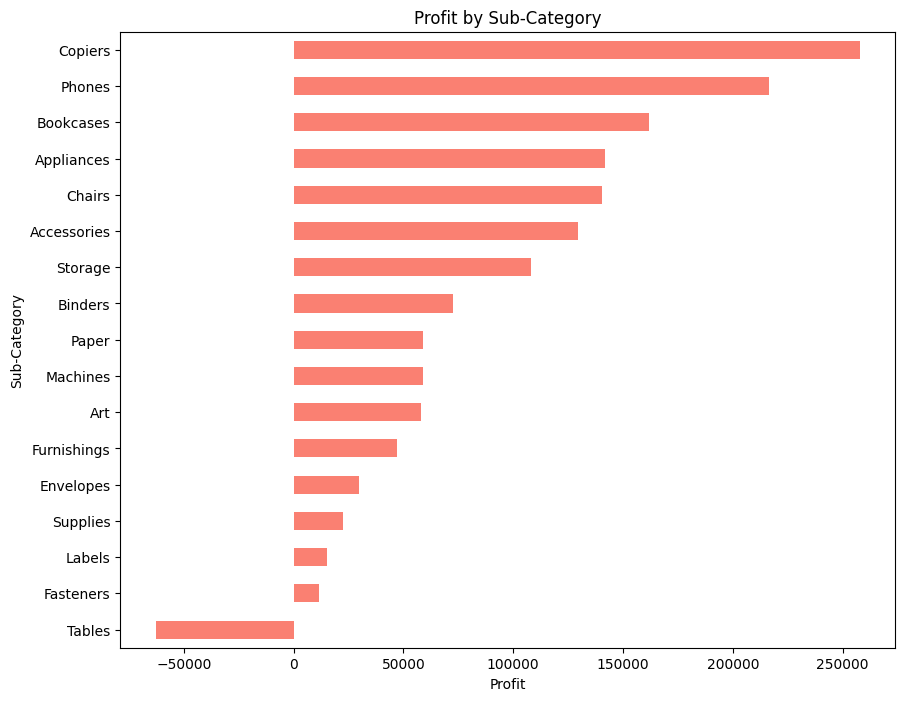

In [165]:
plt.figure(figsize=(10, 8))
sub_category_profit = df.groupby('sub_category')['profit'].sum().sort_values()
sub_category_profit.plot(kind='barh', color='salmon')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()


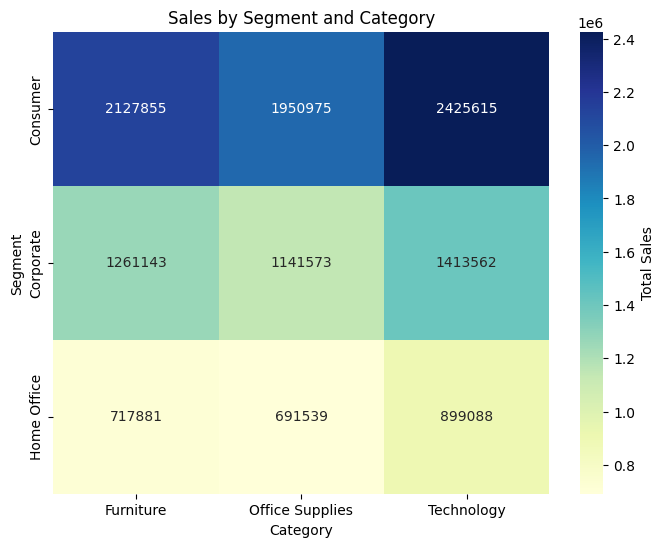

In [166]:
segment_category_sales = df.pivot_table(values='sales', index='segment', columns='category', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(segment_category_sales, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Total Sales'})
plt.title('Sales by Segment and Category')
plt.xlabel('Category')
plt.ylabel('Segment')
plt.show()


##### FEATURE ENGINEERING

In [167]:
region_sales_avg = df.groupby('region')['sales'].transform('mean')
region_discount_avg = df.groupby('region')['discount'].transform('mean')
region_profit_avg = df.groupby('region')['profit'].transform('mean')

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\1822810038.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales_avg = df.groupby('region')['sales'].transform('mean')
C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\1822810038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_discount_avg = df.groupby('region')['discount'].transform('mean')
C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\1822810038.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

In [168]:
df['region_sales_avg'] = region_sales_avg
df['region_discount_avg'] = region_discount_avg
df['region_profit_avg'] = region_profit_avg

In [169]:
df['customer_lifetime_sales'] = df.groupby('customer_id')['sales'].transform('cumsum')

df['customer_avg_order_value'] = df.groupby('customer_id')['sales'].transform('mean')

In [170]:
df['category_avg_sales'] = df.groupby('category')['sales'].transform('mean')
df['sub_category_avg_sales'] = df.groupby('sub_category')['sales'].transform('mean')

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\4054265831.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['category_avg_sales'] = df.groupby('category')['sales'].transform('mean')
C:\Users\NITHYA\AppData\Local\Temp\ipykernel_34184\4054265831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['sub_category_avg_sales'] = df.groupby('sub_category')['sales'].transform('mean')


In [171]:
df['profit_margin'] = df['profit'] / df['sales'].replace(0, 1) 

In [172]:
df['shipping_cost_per_item'] = df['shipping_cost'] / df['quantity'].replace(0, 1) 

df['shipping_cost_pct_of_sales'] = df['shipping_cost'] / df['sales'].replace(0, 1) 

In [173]:
df['discount_amount'] = df['sales'] * df['discount']

df['discount_pct_of_sales'] = df['discount'] * 100

In [174]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'shipping_duration',
       'region_sales_avg', 'region_discount_avg', 'region_profit_avg',
       'customer_lifetime_sales', 'customer_avg_order_value',
       'category_avg_sales', 'sub_category_avg_sales', 'profit_margin',
       'shipping_cost_per_item', 'shipping_cost_pct_of_sales',
       'discount_amount', 'discount_pct_of_sales'],
      dtype='object')

##### Compute correlation matrix

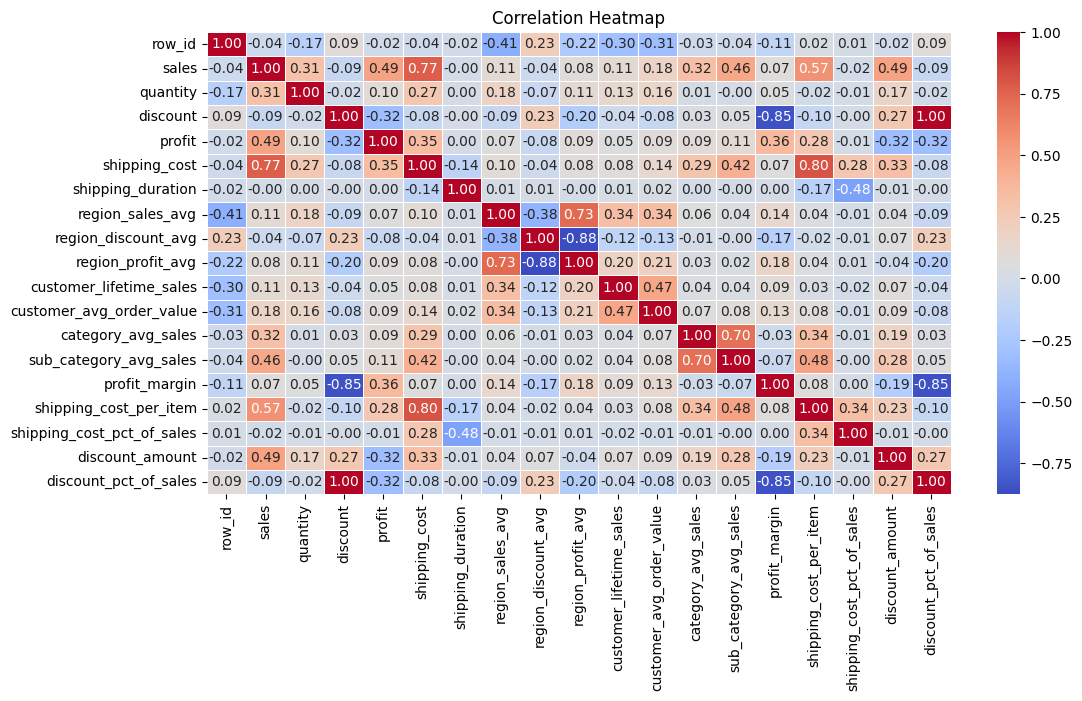

In [175]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()


plt.figure(figsize=(12, 6))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

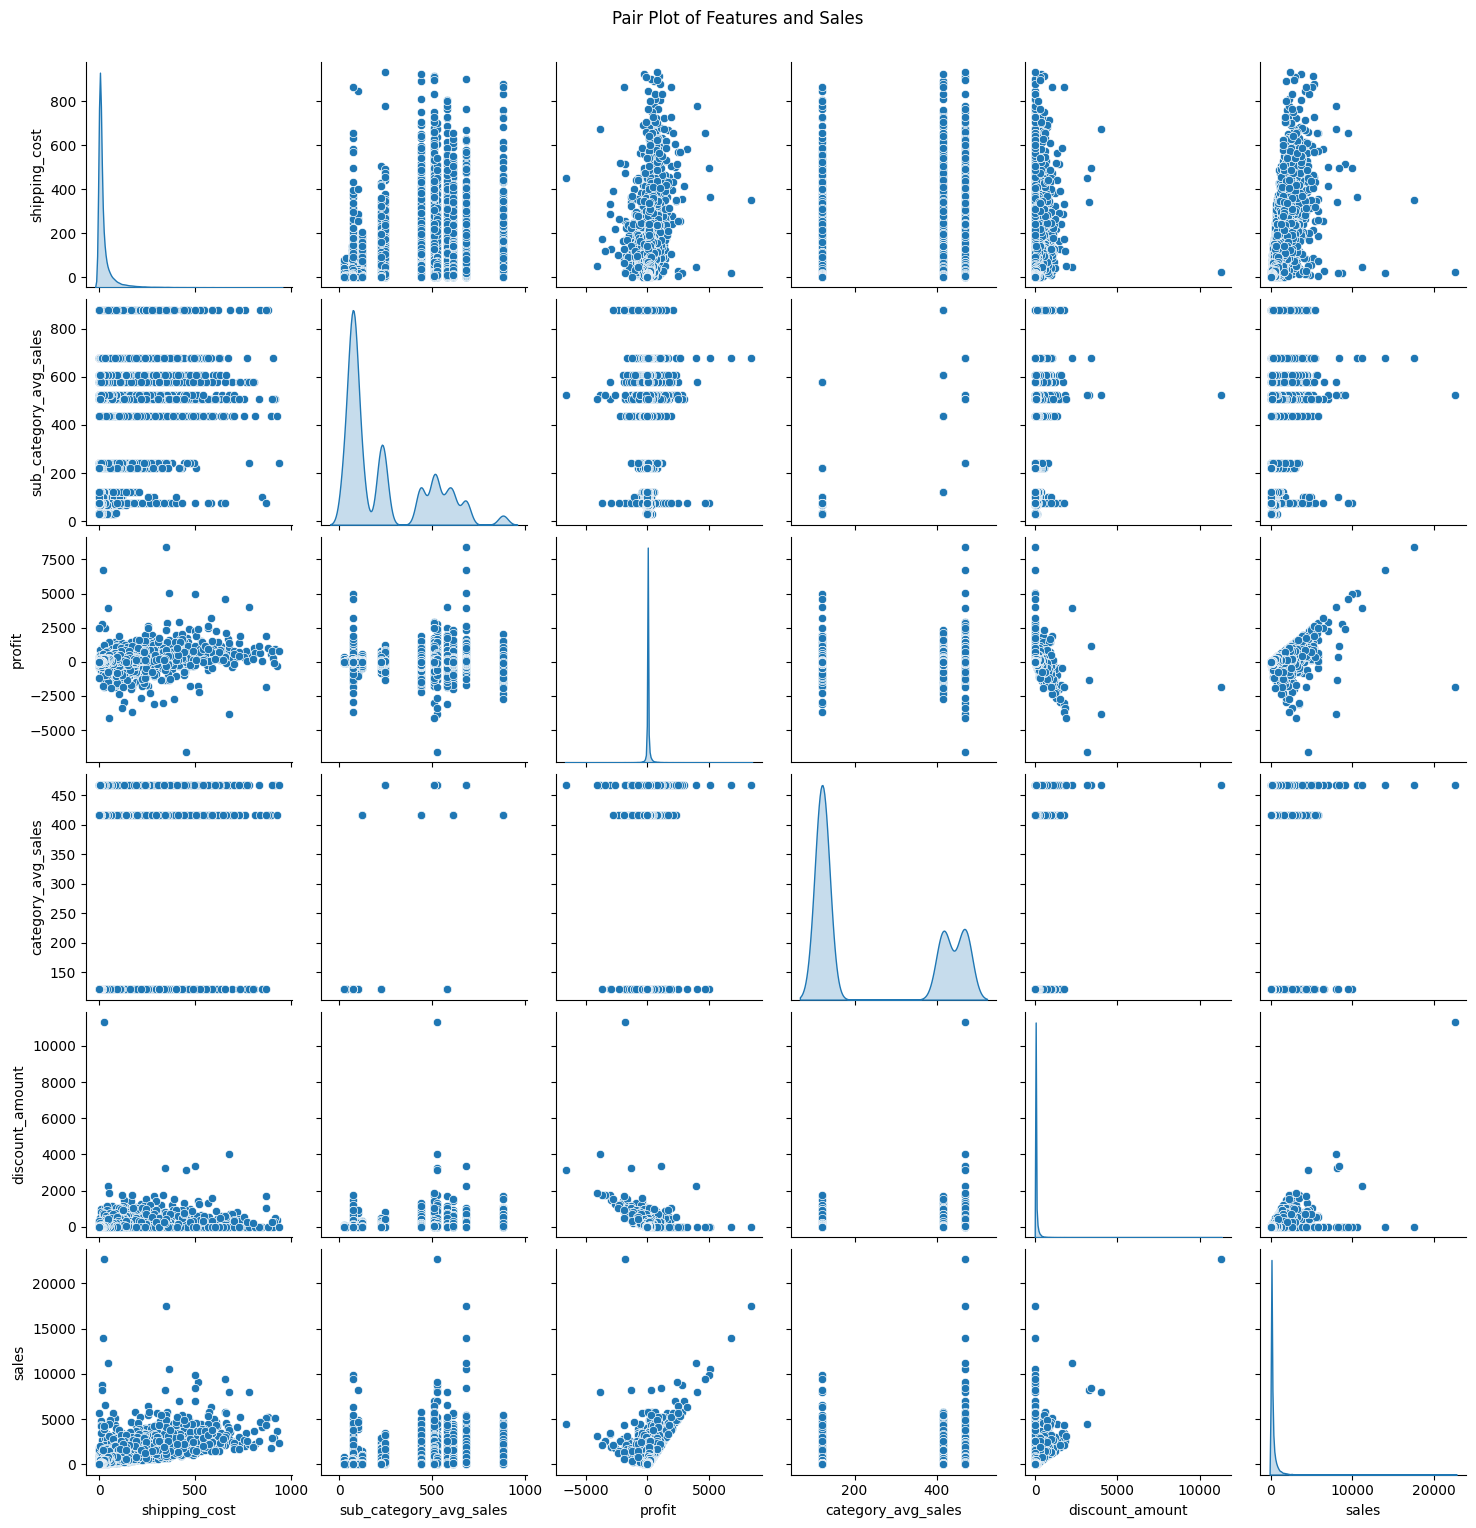

In [176]:
data = df[['shipping_cost', 'sub_category_avg_sales', 'profit', 'category_avg_sales', 'discount_amount', 'sales']]

sns.pairplot(data, diag_kind='kde') 
plt.suptitle('Pair Plot of Features and Sales', y=1.02)
plt.show()

#### MODEL TRAINING

##### Identifying Data Distribution and Understand the spread and central tendency of the data.

In [177]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = [
    "shipping_cost",
    "discount",
    "profit",
    "quantity",
    "sub_category",
    "category",
    "ship_mode",
    "order_priority",
    "region",  
]
target = "sales"

X = df[features]
y = df[target]


In [178]:
X.describe()


,shipping_cost,discount,profit,quantity
count,51227.000000,51227.000000,51227.000000,51227.000000
mean,26.378269,0.142957,28.626176,3.476448
std,57.308377,0.212312,174.347412,2.278951
min,0.000000,0.000000,-6599.978000,1.000000
25%,2.610000,0.000000,0.000000,2.000000
50%,7.790000,0.000000,9.240000,3.000000
75%,24.450000,0.200000,36.808500,5.000000
max,933.570000,0.850000,8399.976000,14.000000


##### 1) The categorical features have been one-hot encoded, with the first category dropped to prevent multicollinearity and make them suitable for machine learning models.

##### 2) The numerical features have been standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1, promoting equal contribution in the model

In [179]:
X = df[features]
y = df[target]

categorical_features = ["sub_category", "category", "ship_mode", "order_priority", "region"]
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)


X_scaled.head()


,shipping_cost,discount,profit,quantity,sub_category_Appliances,sub_category_Art,sub_category_Binders,sub_category_Bookcases,sub_category_Chairs,sub_category_Copiers,...,region_Central,region_Central Asia,region_EMEA,region_East,region_North,region_North Asia,region_Oceania,region_South,region_Southeast Asia,region_West
0,0.158473,-0.673344,0.444598,-0.647869,-0.188236,-0.324525,-0.369164,-0.222044,-0.267926,-0.212737,...,-0.526069,-0.203808,-0.329681,-0.242493,-0.320727,-0.218439,-0.270262,-0.385871,-0.254754,-0.258126
1,-0.290681,-0.202334,0.042501,-0.209067,-0.188236,-0.324525,-0.369164,-0.222044,-0.267926,-0.212737,...,-0.526069,-0.203808,-0.329681,-0.242493,-0.320727,-0.218439,3.700115,-0.385871,-0.254754,-0.258126
2,-0.317727,-0.673344,0.005815,0.229736,-0.188236,-0.324525,-0.369164,-0.222044,-0.267926,-0.212737,...,-0.526069,-0.203808,3.033236,-0.242493,-0.320727,-0.218439,-0.270262,-0.385871,-0.254754,-0.258126
3,-0.376184,1.681708,-0.313636,-0.209067,-0.188236,-0.324525,-0.369164,-0.222044,-0.267926,-0.212737,...,-0.526069,-0.203808,-0.329681,-0.242493,3.117921,-0.218439,-0.270262,-0.385871,-0.254754,-0.258126
4,-0.378278,-0.202334,0.052447,0.668539,-0.188236,-0.324525,-0.369164,-0.222044,-0.267926,-0.212737,...,-0.526069,-0.203808,-0.329681,-0.242493,-0.320727,-0.218439,3.700115,-0.385871,-0.254754,-0.258126


In [180]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = X_scaled
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False, inplace=True)


print("\nPerformance Metrics:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  - Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  - Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  - R-squared (R²): {metrics['R²']:.2f}")



Performance Metrics:

Linear Regression:
  - Mean Squared Error (MSE): 52870.48
  - Mean Absolute Error (MAE): 110.26
  - R-squared (R²): 0.75

Ridge Regression:
  - Mean Squared Error (MSE): 52875.76
  - Mean Absolute Error (MAE): 110.23
  - R-squared (R²): 0.75

Lasso Regression:
  - Mean Squared Error (MSE): 52882.32
  - Mean Absolute Error (MAE): 109.03
  - R-squared (R²): 0.75

Decision Tree:
  - Mean Squared Error (MSE): 50579.43
  - Mean Absolute Error (MAE): 82.30
  - R-squared (R²): 0.76

Random Forest:
  - Mean Squared Error (MSE): 26038.40
  - Mean Absolute Error (MAE): 60.69
  - R-squared (R²): 0.88

Gradient Boosting:
  - Mean Squared Error (MSE): 26916.98
  - Mean Absolute Error (MAE): 65.13
  - R-squared (R²): 0.87

Support Vector Regressor:
  - Mean Squared Error (MSE): 158732.58
  - Mean Absolute Error (MAE): 145.18
  - R-squared (R²): 0.25


##### 1) RandomizedSearchCV is used to tune the hyperparameters of both Random Forest and Gradient Boosting models, optimizing their        performance

##### 2) The best parameters and R² scores from cross-validation are reported, followed by evaluation on the test set to assess the final performance metrics.

In [181]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

gb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Tuning Random Forest...")
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_random_search.fit(X_train_scaled, y_train)

print("Tuning Gradient Boosting...")
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
gb_random_search.fit(X_train_scaled, y_train)

print("\nBest Parameters for Random Forest:")
print(rf_random_search.best_params_)
print("Best R² for Random Forest (Training CV):", rf_random_search.best_score_)

print("\nBest Parameters for Gradient Boosting:")
print(gb_random_search.best_params_)
print("Best R² for Gradient Boosting (Training CV):", gb_random_search.best_score_)

print("\nEvaluating Tuned Models on Test Set...")
rf_best_model = rf_random_search.best_estimator_
gb_best_model = gb_random_search.best_estimator_

rf_y_pred = rf_best_model.predict(X_test_scaled)
gb_y_pred = gb_best_model.predict(X_test_scaled)

rf_test_mse = mean_squared_error(y_test, rf_y_pred)
rf_test_r2 = r2_score(y_test, rf_y_pred)
gb_test_mse = mean_squared_error(y_test, gb_y_pred)
gb_test_r2 = r2_score(y_test, gb_y_pred)

print(f"\nRandom Forest Test MSE: {rf_test_mse:.2f}")
print(f"Random Forest Test R²: {rf_test_r2:.2f}")

print(f"\nGradient Boosting Test MSE: {gb_test_mse:.2f}")
print(f"Gradient Boosting Test R²: {gb_test_r2:.2f}")


Tuning Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuning Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Random Forest:
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best R² for Random Forest (Training CV): 0.8162423148825387

Best Parameters for Gradient Boosting:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best R² for Gradient Boosting (Training CV): 0.8125456023372136

Evaluating Tuned Models on Test Set...

Random Forest Test MSE: 25846.78
Random Forest Test R²: 0.88

Gradient Boosting Test MSE: 23138.32
Gradient Boosting Test R²: 0.89


Random Forest Performance:
MAE: 60.326174204960296
RMSE: 159.9585469741383
R² Score: 0.8798563970542231


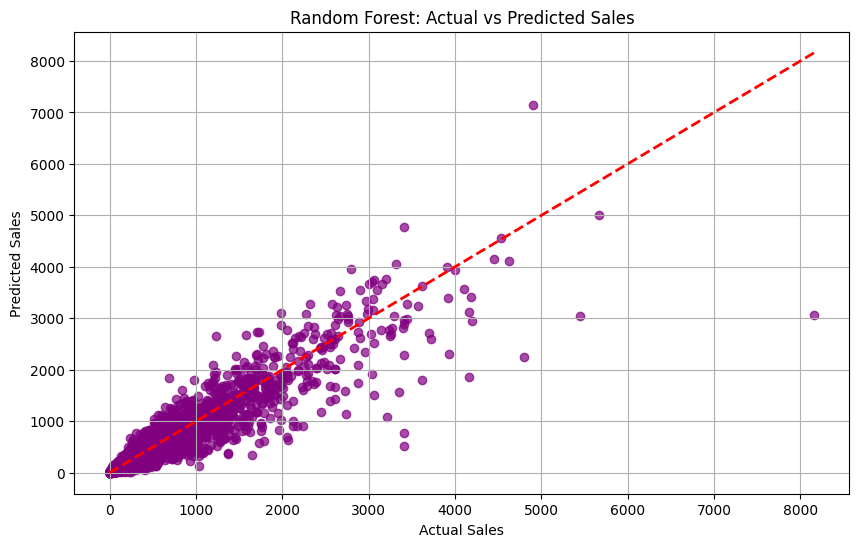

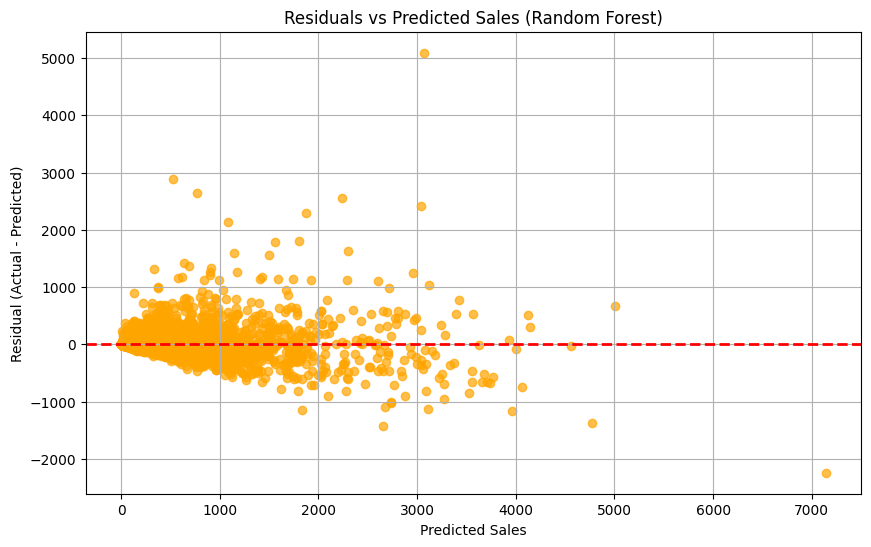

In [182]:



from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestRegressor(
    random_state=42,
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=20,
    bootstrap=True
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Random Forest: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Sales (Random Forest)')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid()
plt.show()


Gradient Boosting Performance:
MAE: 59.288361852027236
RMSE: 152.11285918353084
R² Score: 0.8913530322439596


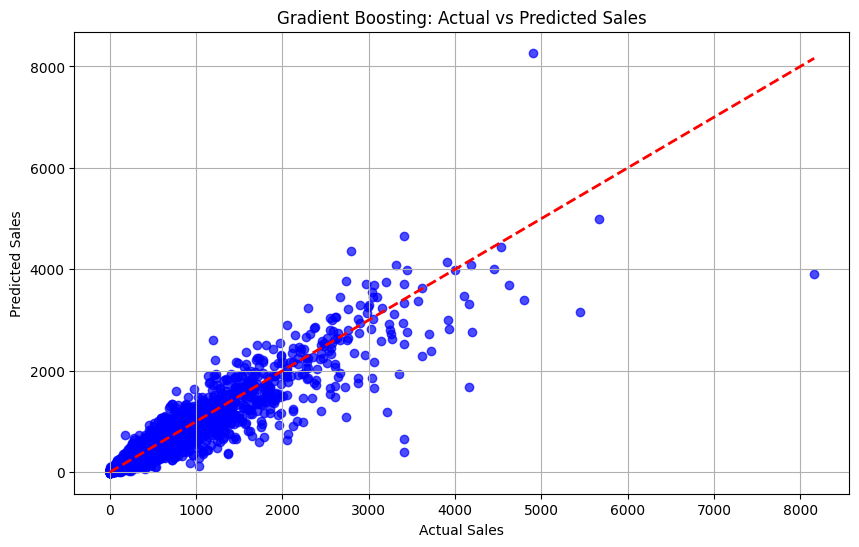

In [183]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=2,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Gradient Boosting: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()



In [184]:
df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,region_profit_avg,customer_lifetime_sales,customer_avg_order_value,category_avg_sales,sub_category_avg_sales,profit_margin,shipping_cost_per_item,shipping_cost_pct_of_sales,discount_amount,discount_pct_of_sales
51222,16207.0,ES-2013-5147891,2013-12-31,2014-01-06,Standard Class,PF-19225,Phillip Flathmann,Consumer,Dresden,Saxony,...,28.012275,11915.19970,224.815089,121.141166,34.365590,-0.843400,0.355,0.052946,6.7050,50.0
51223,42653.0,TU-2013-9400,2013-12-31,2014-01-04,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,8.743526,2063.02200,82.520880,416.265857,121.641634,-0.550595,0.590,0.058532,6.0480,60.0
51224,39963.0,CA-2013-163951,2013-12-31,2014-01-03,First Class,CJ-11875,Carl Jackson,Corporate,Philadelphia,Pennsylvania,...,32.157520,12538.83296,298.543642,121.141166,76.218418,0.100000,0.084,0.025424,3.3040,20.0
51225,37057.0,US-2013-111528,2013-12-31,2013-12-31,Same Day,JP-16135,Julie Prescott,Home Office,Los Angeles,California,...,33.877519,10163.50860,184.791065,121.141166,75.145385,0.337500,0.340,0.053258,1.2768,20.0
51226,36058.0,CA-2013-117660,2013-12-31,2014-01-05,Standard Class,BM-11785,Bryan Mills,Consumer,Columbus,Ohio,...,32.157520,18446.85290,271.277249,121.141166,28.174681,0.337500,0.115,0.038957,1.1808,20.0


In [185]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'shipping_duration',
       'region_sales_avg', 'region_discount_avg', 'region_profit_avg',
       'customer_lifetime_sales', 'customer_avg_order_value',
       'category_avg_sales', 'sub_category_avg_sales', 'profit_margin',
       'shipping_cost_per_item', 'shipping_cost_pct_of_sales',
       'discount_amount', 'discount_pct_of_sales'],
      dtype='object')

In [189]:
df_monthly=df[['order_date','sales']]

In [190]:
df_monthly.head()

,order_date,sales
0,2011-01-01,408.300
1,2011-01-01,120.366
2,2011-01-01,66.120
3,2011-01-01,44.865
4,2011-01-01,113.670


#### Sales Forecasting

R-squared (R²): 0.898138024080929
            Predicted Sales
2014-01-31    228003.791193
2014-02-28    196040.195337
2014-03-31    263017.404481
2014-04-30    240140.141029
2014-05-31    306011.137921
2014-06-30    407374.937999
2014-07-31    251897.833214
2014-08-31    398131.773650
2014-09-30    448340.911373
2014-10-31    361794.711822
2014-11-30    465125.749039
2014-12-31    497953.297146


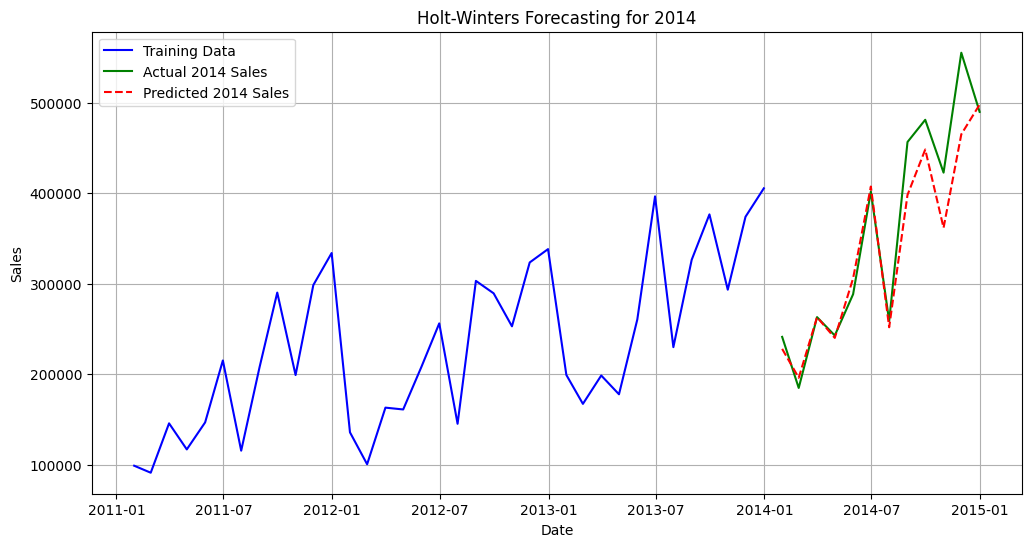

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if 'order_date' not in df_monthly.columns and df_monthly.index.name != 'order_date':
    raise KeyError("Error: 'order_date' column not found. Check your dataset.")

if 'order_date' in df_monthly.columns:
    df_monthly['order_date'] = pd.to_datetime(df_monthly['order_date'])
    df_monthly.set_index('order_date', inplace=True)

df_monthly = df_monthly.sort_index()
df_monthly = df_monthly.resample('M').sum()

train_data = df_monthly[df_monthly.index.year < 2014]
test_data = df_monthly[df_monthly.index.year == 2014]

model = ExponentialSmoothing(
    train_data['sales'], 
    trend='add',        
    seasonal='add',     
    seasonal_periods=12,
    use_boxcox=True
).fit(optimized=True, remove_bias=True)

forecast_2014 = model.forecast(steps=12)

forecast_2014.index = pd.date_range(start='2014-01-01', periods=12, freq='M')

predicted_sales_2014 = pd.DataFrame({'Predicted Sales': forecast_2014})

mae = mean_absolute_error(test_data['sales'], forecast_2014)
mse = mean_squared_error(test_data['sales'], forecast_2014)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['sales'], forecast_2014)


print(f"R-squared (R²): {r2}")

print(predicted_sales_2014)

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['sales'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['sales'], label='Actual 2014 Sales', color='green')
plt.plot(forecast_2014.index, forecast_2014, label='Predicted 2014 Sales', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Holt-Winters Forecasting for 2014')
plt.legend()
plt.grid()
plt.show()


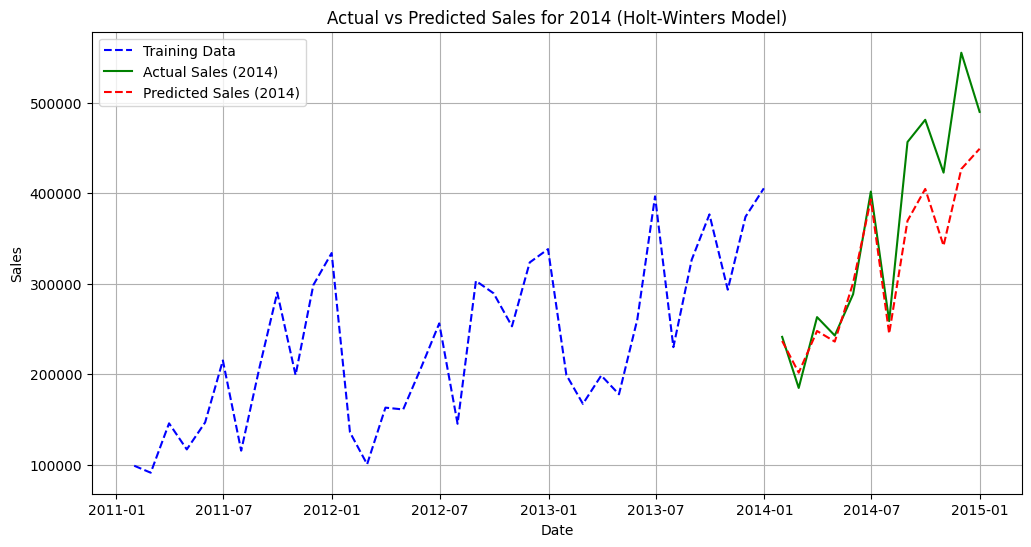

In [198]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['sales'], label='Training Data', color='blue', linestyle='dashed')
plt.plot(test_data.index, test_data['sales'], label='Actual Sales (2014)', color='green')
plt.plot(predicted_sales_2014.index, predicted_sales_2014['Predicted Sales'], label='Predicted Sales (2014)', color='red', linestyle='dashed')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales for 2014 (Holt-Winters Model)')
plt.legend()
plt.grid(True)
plt.show()
